In [2]:
# import libraries 
# ----------------
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# check .mat file 
# ---------------
from scipy.io import whosmat
whosmat('OBC_synthetic_data_PS.mat') # to list variables inside mat file

[('vx', (60000, 2400), 'double'),
 ('vz', (60000, 2400), 'double'),
 ('pressure', (60000, 2400), 'double')]

In [4]:
# load .mat file 
# --------------
from scipy.io import loadmat
mat = loadmat('OBC_synthetic_data_PS.mat')  # to load mat file
# convert them to numpy array
vx = mat['vx']
vz = mat['vz']
pressure = mat['pressure']

In [5]:
# initialize parameters 
# ---------------------
nx = vx.shape[1] # number of cells in x direction
dx = 0.25        # cell size
dt = 5e-6        # time step
alpha = 1800     # P-wave velocity
beta = 700       # S-wave velocity
rho = 1600       # density

In [6]:
# calculate wavefield gradients 
# -----------------------------
from fd_weights import *
c = fd_weights(0, [-3/2, -1/2, 1/2, 3/2], 1) # FD coefficients according to Fornberg (1988)

# allocate zero gradients
gradx_vx       = np.zeros((      vx.shape[0],nx))
gradx_vz       = np.zeros((      vz.shape[0],nx))
gradx_pressure = np.zeros((pressure.shape[0],nx))

for n in range(2,(vx.shape[1]-2)):
    # horizontal gradients of vx
    gradx_vx[:,n] = ((c[0]*vx[:,n-1]) + (c[1]*vx[:,n])   + (c[2]*vx[:,n+1]) + (c[3]*vx[:,n+2])) / dx
    # horizontal gradients of vz
    gradx_vz[:,n] = ((c[0]*vz[:,n-2]) + (c[1]*vz[:,n-1]) + (c[2]*vz[:,n])   + (c[3]*vz[:,n+1])) / dx
    # horizontal gradient of pressure
    gradx_pressure[:,n] = ((c[0]*pressure[:,n-2]) + (c[1]*pressure[:,n-1]) \
                         + (c[2]*pressure[:,n])   + (c[3]*pressure[:,n+1])) / dx
    
# P/S separation 
# --------------
# upgoing P-wave on vz
vz_P_up = (1/2.) * (vz + ((beta*((2*beta)/alpha)) * (gradx_vx.cumsum(axis=0)*dt)) - ((1/(alpha * rho)) * pressure))
# upgoing S-wave on vx
vx_S_up = (1/2.) * (vx - ((2*beta) * (gradx_vz.cumsum(axis=0)*dt)) + ((1/rho) * (gradx_pressure.cumsum(axis=0)*dt)))

<IPython.core.display.Javascript object>


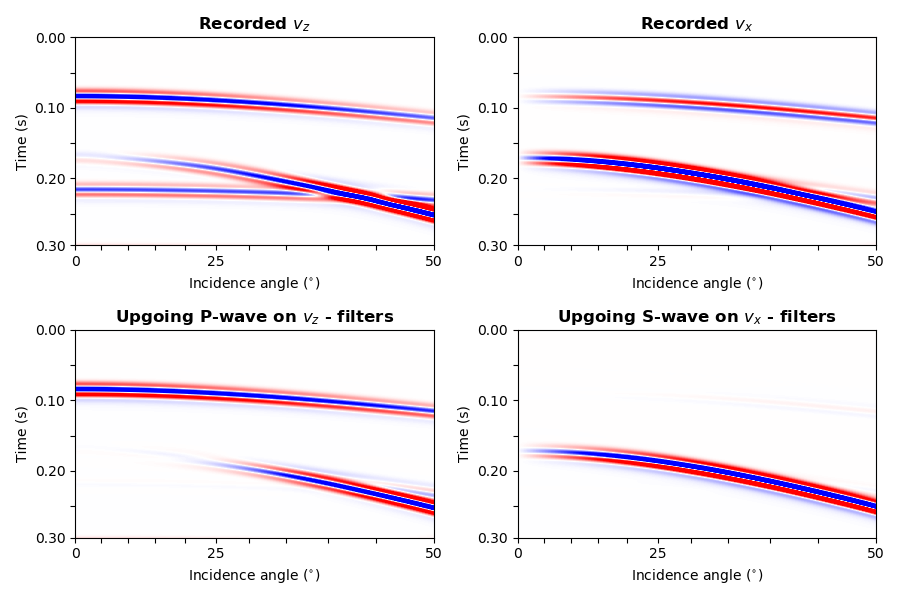

In [25]:
# plotting configuration 
# ----------------------
plt.figure(figsize=(9, 6))

# recorded vz
plt.subplot(2,2,1)
vm1 = np.percentile(vz, 99)
plt.imshow(-vz, cmap="bwr", vmin=-vm1, vmax=vm1, aspect='auto')
plt.xlim(1200,1677)
plt.ylim(59000,1)
plt.title('Recorded $v_z$',fontweight="bold")
plt.xlabel('Incidence angle ($^{\circ}$)')
plt.ylabel('Time (s)')
plt.xticks([1200,1235,1271,1307,1346,1387,1431,1480,1536,1600,1677],['0','','','','','25','','','','','50'])
plt.yticks([1,10000,20000,30000,40000,50000,59000],['0.00','','0.10','','0.20','','0.30'])

# P/S separated upgoing vz
plt.subplot(2,2,3)
vm2 = np.percentile(vz_P_up, 99)
plt.imshow(-vz_P_up, cmap="bwr", vmin=-vm2, vmax=vm2, aspect='auto')
plt.xlim(1200,1677)
plt.ylim(59000,1)
plt.title('Upgoing P-wave on $v_z$ - filters',fontweight="bold")
plt.xlabel('Incidence angle ($^{\circ}$)')
plt.ylabel('Time (s)')
plt.xticks([1200,1235,1271,1307,1346,1387,1431,1480,1536,1600,1677],['0','','','','','25','','','','','50'])
plt.yticks([1,10000,20000,30000,40000,50000,59000],['0.00','','0.10','','0.20','','0.30'])

# recorded vx
plt.subplot(2,2,2)
vm3 = np.percentile(vx, 99)
plt.imshow(-vx, cmap="bwr", vmin=-vm3, vmax=vm3, aspect='auto')
plt.xlim(1200,1677)
plt.ylim(59000,1)
plt.title('Recorded $v_x$',fontweight="bold")
plt.xlabel('Incidence angle ($^{\circ}$)')
plt.ylabel('Time (s)')
plt.xticks([1200,1235,1271,1307,1346,1387,1431,1480,1536,1600,1677],['0','','','','','25','','','','','50'])
plt.yticks([1,10000,20000,30000,40000,50000,59000],['0.00','','0.10','','0.20','','0.30'])

# P/S separated upgoing vx
plt.subplot(2,2,4)
vm4 = np.percentile(vx_S_up, 99)
plt.imshow(-vx_S_up, cmap="bwr", vmin=-vm4, vmax=vm4, aspect='auto')
plt.xlim(1200,1677)
plt.ylim(59000,1)
plt.title('Upgoing S-wave on $v_x$ - filters',fontweight="bold")
plt.xlabel('Incidence angle ($^{\circ}$)')
plt.ylabel('Time (s)')
plt.xticks([1200,1235,1271,1307,1346,1387,1431,1480,1536,1600,1677],['0','','','','','25','','','','','50'])
plt.yticks([1,10000,20000,30000,40000,50000,59000],['0.00','','0.10','','0.20','','0.30'])

# show result on screen
plt.tight_layout()
plt.show()